# Machine Learning Model with <span style = 'color: orange;'>Scikit</span> - <span style = 'color: DodgerBlue;'>Learn</span>
<center>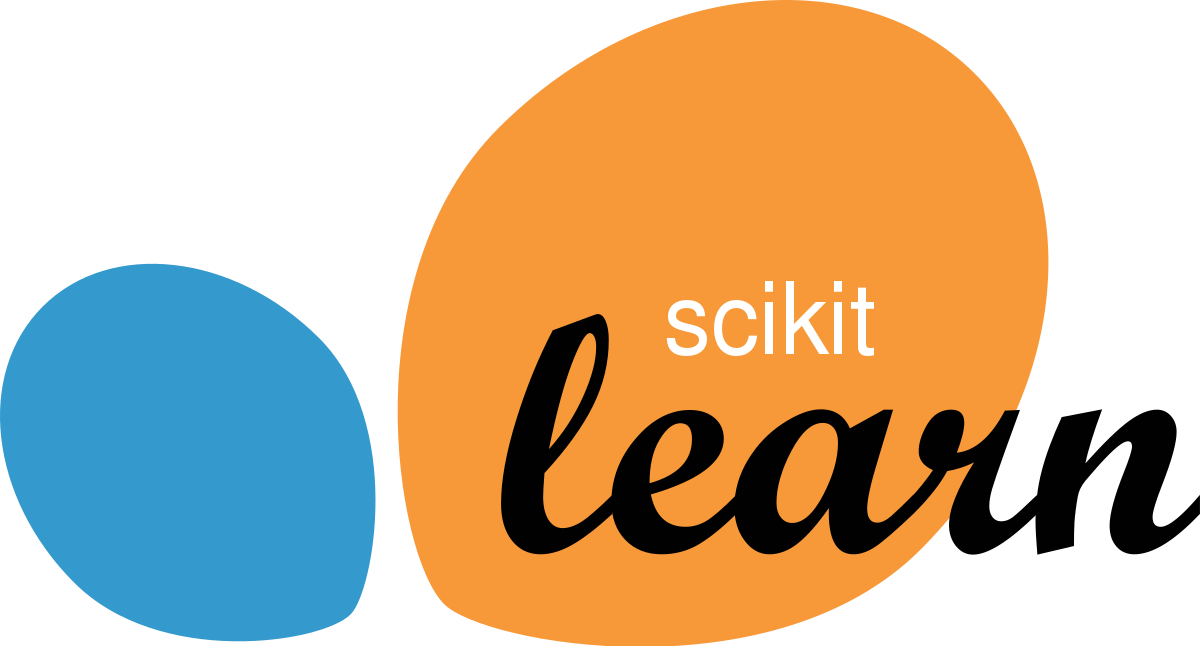</center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<h3>Import Data Set</h3>

In [ ]:
df_Ad = pd.read_csv('Advertising.csv')
df_Ad.head()

In [ ]:
df_Ad.info()

In [ ]:
df_Ad.isnull().sum()

In [ ]:
df_Ad.drop('Unnamed: 0', axis=1, inplace=True)

<h4> Calculate <code>Correlation Coefficient (Pearson's)</code> for display relation of data
$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$
<h4>or use function<code>dataframe.corr()</code></h4>

In [ ]:
sns.heatmap(df_Ad.corr(), annot=True)

<h4>Scatter Plot</h4>

In [ ]:
# Plotly
go.Figure(go.Scatter(x=df_Ad.TV, y=df_Ad.Sales, mode='markers', name='Data'))

In [ ]:
# Matplotlib
plt.scatter(df_Ad.TV, df_Ad.Sales)

<h3>Preprocess Data</h3>

In [ ]:
X = df_Ad[['TV']].values
y = df_Ad[['Sales']].values

In [ ]:
print(f'X shape: {X.shape} \ny shape: {y.shape}')

<h3>Data Spliting <code>Train Test Split</code></h3>

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 58 699199

In [ ]:
print(f"X_train shape = {X_train.shape} \ny_train shape = {y_train.shape} \n------------------")
print(f"X_test shape = {X_test.shape} \ny_test shape = {y_test.shape}")

<h3>SSE (Sum of Squares Error) Calculation when {intercept = 0, slope = 0}</h3>
$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$

In [ ]:
# SSE when intercept, slope = 0
beta_0 = np.array([0])
y_pred_0 = X_train @ beta_0

SSE_0 = (y_train - y_pred_0).T@(y_train - y_pred_0)

scientific_notation = "{:e}".format(SSE_0[0, 0])
print(f"SSE_0 = {SSE_0[0, 0]}, {scientific_notation}")

<h3>Build Model <code>LinearRegression()</code> and Training</h3>

In [ ]:
model_Adspen = linear_model.LinearRegression()
model_Adspen.fit(X_train, y_train) # Training Data

In [ ]:
# Intercept and Slope (coefficient)
intercept, slope = model_Adspen.intercept_[0], model_Adspen.coef_[0, 0]
print(f"Intercept = {intercept}, Slope = {slope}")

<h3>Scatter Plot with Regression Line</h3>

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X_train[:, 0], y = y_train[:, 0], mode = 'markers', name = 'Data Point'))
fig.add_trace(go.Scatter(x = X_train[:, 0], y = intercept + slope * X_train[:, 0], mode = 'lines', name = 'Linear Regression'))
fig.update_layout(
    xaxis_title="TV (Ad Spending)",
    yaxis_title="Sales"
)

<h3>SSE (Sum of Squares Error) Calculation after training model <code>LinearRegression()</code></h3>
$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$

In [ ]:
# SSE after estimate Intercept and Slope
y_pred_train_set = intercept + slope * X_train

SSE = np.sum((y_train - y_pred_train_set)**2)

scientific_notation = "{:e}".format(SSE)
print(f"SSE = {SSE}, {scientific_notation}")

<h3>R-Squared</h3>

In [ ]:
# R-Squared
r2 = r2_score(y_test, model_Adspen.predict(X_test))
print(f'R-squared: {r2}')

<h3>Prediction</h3>

In [ ]:
# Prediction
y_pred = model_Adspen.predict(X_test)
data_dict = {
    "X_test": X_test[:, 0],
    "Predict Value": y_pred[:, 0]
}
pd.DataFrame(data_dict).head()

In [ ]:
import gradio as gr

def prediction(X):
    y_pred = model_Adspen.predict(np.array([[X]]))[0, 0]
    return round(y_pred, 4)

demo = gr.Interface(
    fn=prediction,
    inputs=["number"],
    outputs=["text"],
)

demo.launch()